In [ ]:
# Load drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from tifffile import *
from glob import glob
!pip install rasterio
!pip install earthpy
import rasterio
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from matplotlib.patches import Patch
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

from matplotlib.colors import Normalize
from scipy.interpolate import interpn
import rasterio as rio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

# Import libraries
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.interpolate import interpn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Import Python 3's print function and division
from __future__ import print_function, division

# Import GDAL, NumPy, and matplotlib
from osgeo import gdal, gdal_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from osgeo import gdal
import os
import glob
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)


from scipy.ndimage.filters import generic_filter
from scipy.stats import mode

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import xgboost as xgb

# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.interpolate import interpn
from google.colab import files

np.seterr(divide='ignore', invalid='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 76.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 89.4 MB/s eta 0:00:00


<ipython-input-2-4f6808ef3848>:77: DeprecationWarning: Please use `generic_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import generic_filter


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
## Stack image with reference
with rasterio.open('/content/drive/MyDrive/GEE_composites/median_reflectance.tif') as src:
    reference = src.read()
reference = reference[-1,:,:]
reference.shape

(3783, 5389)

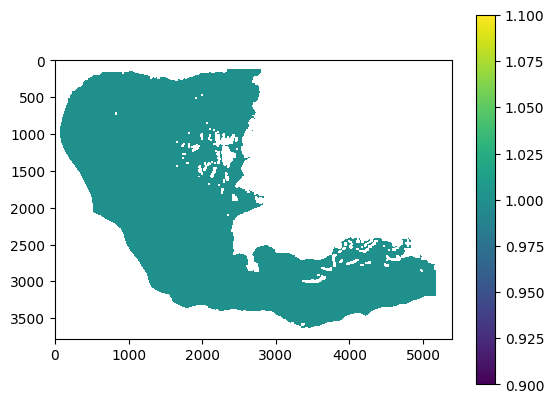

In [ ]:
## Stack image with reference
with rasterio.open('/content/drive/MyDrive/GEE_composites/median_reflectance.tif') as src:
    ref = src.read()

ref[-1,:,:][ref[-1,:,:] > 0] = 1
ref[-1,:,:][ref[-1,:,:] < 0] = 1
ref[-1,:,:][ref[-1,:,:] == 0] = 1
ref = ref[-1,:,:]

pc = plt.imshow(ref)
plt.colorbar(pc)

## Load functions

In [ ]:
import tensorflow as tf

def masked_rmse(y_true, y_pred):
    # Create a mask of non-NaN and non-zero values
    mask = tf.math.logical_and(~tf.math.is_nan(y_true), y_true != 0)

    # Apply the mask to both y_true and y_pred
    y_true = tf.boolean_mask(y_true, mask)
    y_pred = tf.boolean_mask(y_pred, mask)

    # Calculate the RMSE between non-NaN, non-zero elements
    mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
    rmse = tf.math.sqrt(mse)

    return rmse

In [ ]:
def split_data_test(zeroed_patches_test, patch_size):
    X_test = zeroed_patches_test[:, :, :, :-1]
    y_test = zeroed_patches_test[:, :, :, -1]
    y_test = y_test[..., np.newaxis]

    #y_test = tf.reshape(y_test, (-1, patch_size[0], patch_size[1], 1))

    return X_test, y_test

def split_data(zeroed_patches_train, patch_size, val_prop=0.25):
    # Split the zeroed_patches array into inputs and targets
    X_train = zeroed_patches_train[:, :, :, :-1]
    y_train = zeroed_patches_train[:, :, :, -1]
    y_train = y_train[..., np.newaxis]

    # Calculate the number of samples in the validation set
    val_samples = int(X_train.shape[0] * val_prop)

    # Split the training data into training and validation sets
    X_val = X_train[-val_samples:, :, :, :]
    y_val = y_train[-val_samples:, :, :, :]
    X_train = X_train[:-val_samples, :, :, :]
    y_train = y_train[:-val_samples, :, :, :]

    return X_train, y_train, X_val, y_val

def evaluate_model(predictions, y_test):
    predictions = np.array(predictions)
    y_test = np.array(y_test)

    # Calculate the RMSE
    rmse = np.sqrt(np.nanmean((predictions - y_test) ** 2))
    print('RMSE:', rmse)

    y_test_flat = y_test.flatten()
    predictions_flat = predictions.flatten()
    df_pred = pd.DataFrame(predictions_flat)
    df_test = pd.DataFrame(y_test_flat)
    df = pd.concat([df_test, df_pred], axis =1)
    df2 = df.dropna() # Remove NaN values
    df2.columns = ['Reference','Predicted']
    df2= df2[df2['Reference'] < 0] # set max ref depth
    df2= df2[df2['Predicted'] > -50] # set max ref depth
    df2= df2[df2['Predicted'] < 0] # set max ref depth

    #df2= df2[df2['Reference'] > -10] # set max ref depth
    #df2 = df2.dropna() # Remove NaN values
    df3 = df2.reset_index(drop=True)
    df3['Error'] = df3['Predicted'] - df3['Reference']

    # Metrics
    rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
    r2 = metrics.r2_score(df3.Reference, df3.Predicted)
    mae = np.mean(abs(df3.Reference - df3.Predicted))
    return df3, mae, rmse, r2

def reshape_predictions(predictions, image, patch_size, removed_indices):
    # Get the shape of the original test area image
    test_area_shape = image.shape

    # Create a new array with the same shape as the test area image, filled with NaN values
    reconstructed_test_area = np.full(test_area_shape, np.nan)

    # Calculate the number of patches in each dimension
    n_rows = (test_area_shape[0] - patch_size[0]) // patch_size[0] + 1
    n_cols = (test_area_shape[1] - patch_size[1]) // patch_size[1] + 1

    # Create a mask with True values for the removed patches
    removed_mask = np.zeros((n_rows, n_cols), dtype=bool)
    removed_mask[np.unravel_index(removed_indices, (n_rows, n_cols))] = True

    # Loop over the patches and fill in the corresponding elements in the reconstructed test area
    patch_index = 0
    for i in range(0, test_area_shape[0] - patch_size[0] + 1, patch_size[0]):
        for j in range(0, test_area_shape[1] - patch_size[1] + 1, patch_size[1]):
            if not removed_mask[i // patch_size[0], j // patch_size[1]]:
                # If the patch was not removed, use the corresponding patch from predictions
                patch = predictions[patch_index, :, :, :]
                reconstructed_test_area[i:i + patch_size[0], j:j + patch_size[1], :] = patch
                patch_index += 1
            else:
                # If the patch was removed, fill in the corresponding region with NaNs
                reconstructed_test_area[i:i + patch_size[0], j:j + patch_size[1], :] = np.nan

    return reconstructed_test_area

def concat_ref_images(image_1, image_2, image_3, image_4):
    ref_image_1 = image_1[:,:,-1]
    ref_image_2 = image_2[:,:,-1]
    ref_image_3 = image_3[:,:,-1]
    ref_image_4 = image_4[:,:,-1]

    ref_1_2 = np.concatenate((ref_image_1, ref_image_2), axis = 0)

    ref_image_4_pad = np.pad(ref_image_4, [(0,0), (0,211)], 'constant', constant_values=(np.nan,))
    ref_3_4 = np.concatenate((ref_image_3, ref_image_4_pad), axis = 1)
    ref_3_4 = np.pad(ref_3_4, [(0,147), (0,0)], 'constant', constant_values=(np.nan,))
    ref_3_4 = ref_3_4[:,0:5389]

    ref_all = np.concatenate((ref_1_2, ref_3_4), axis = 0)

    return ref_all

def reshape_all_predictions(pred_image_1, pred_image_2, pred_image_3, pred_image_4, ref_all):
    pred_image_1 = pred_image_1[:,:,-1]
    pred_image_2 = pred_image_2[:,:,-1]
    pred_image_3 = pred_image_3[:,:,-1]
    pred_image_4 = pred_image_4[:,:,-1]
    y_pred_1_2 = np.concatenate((pred_image_1, pred_image_2), axis = 0)
    pred_image_4_pad = np.pad(pred_image_4, [(0,0), (0,211)], 'constant', constant_values=(np.nan,))
    y_pred_3_4 = np.concatenate((pred_image_3, pred_image_4_pad), axis = 1)
    y_pred_3_4 = np.pad(y_pred_3_4, [(0,147), (0,0)], 'constant', constant_values=(np.nan,))
    y_pred_3_4 = y_pred_3_4[:,0:5389]
    y_pred_all = np.concatenate((y_pred_1_2, y_pred_3_4), axis = 0)
    y_pred_mask = y_pred_all.copy()
    y_pred_mask[y_pred_mask <= 0] = 1
    ref_all_masked = ref_all * y_pred_mask
    ref_mask = ref_all_masked.copy()
    ref_mask[ref_mask <= 0] = 1
    y_pred_all_masked = y_pred_all * ref_mask
    return y_pred_all_masked, ref_all_masked

def stack_layers(image, ref, reference):
    image = image.astype(np.float32) # from integer to float
    image = np.where(image == 0, np.nan, image)
    image = np.where(image < 0, np.nan, image)
    image = np.concatenate((image, reference[np.newaxis,:,:]), axis=0)

    image_copy = np.isnan(image).any(axis=0)
    image_copy = np.where(image_copy, np.nan, 1)
    image = image * image_copy
    #image = np.moveaxis(image, 0, -1)
    return image

def remove_nan(image):
    image = image.astype(np.float32) # from integer to float
    nan_mask = np.any(np.isnan(image), axis=0)
    image[:, nan_mask] = np.nan

    return image

def clean_image(image):
    # Create a mask for the pixels where the last band is less than -20
    mask = image[:, :, 12] < -20
    image[mask, :] = np.nan
    return image


def remove_patches_with_too_many_NaN(patches, threshold=0.7):
    # Create an array of the same shape as patches to store the mask
    mask = np.zeros(patches.shape, dtype=bool)
    # Find the indices of the NaN values in each patch
    nan_indices = np.isnan(patches)
    # Use the nan_indices to create the mask
    mask[nan_indices] = True
    # Calculate the fraction of NaN values in each patch
    fraction_NaN = np.mean(mask, axis=(1, 2, 3))
    # Keep only the patches with fewer than the threshold fraction of NaN values
    kept_patches = patches[fraction_NaN < threshold, :, :, :]
    # Get the indices of the removed patches
    removed_indices = np.where(fraction_NaN >= threshold)[0]
    return kept_patches, removed_indices

def set_NaN_to_zero(patches):
    # Replace the NaN values in each patch with 0
    patches[np.isnan(patches)] = 0
    return patches

def extract_patches(image, patch_size):
    # Calculate the number of patches in each dimension
    n_rows = (image.shape[0] - patch_size[0]) // patch_size[0] + 1
    n_cols = (image.shape[1] - patch_size[1]) // patch_size[1] + 1
    n_patches = n_rows * n_cols
    patches = np.zeros((n_patches, patch_size[0], patch_size[1], image.shape[2]))

    # Loop over the patches and extract them using slicing
    patch_index = 0
    for i in range(0, image.shape[0] - patch_size[0] + 1, patch_size[0]):
        for j in range(0, image.shape[1] - patch_size[1] + 1, patch_size[1]):
            patch = image[i:i + patch_size[0], j:j + patch_size[1], :]
            patches[patch_index, :, :, :] = patch
            patch_index += 1
    return patches

def extract_zeroed_patches(image_train, image_test, patch_size=(64, 64, 13), nan_threshold=0.7):
    # Extract the patches for train area
    patches_train = extract_patches(image_train, patch_size)
    print('Number of patches for training:', patches_train.shape[0])
    print('Patch shape:', patches_train.shape[1:])
    # Remove patches with more than `nan_threshold` NaN values
    kept_patches_train, removed_indices = remove_patches_with_too_many_NaN(patches_train, threshold=nan_threshold)
    print(kept_patches_train.shape)
    # Set the NaN values in the kept patches to 0
    zeroed_patches_train = set_NaN_to_zero(kept_patches_train)
    print(zeroed_patches_train.shape)

    # Extract the patches for test area
    patches_test = extract_patches(image_test, patch_size)
    print('Number of patches for testing:', patches_test.shape[0])
    print('Patch shape:', patches_test.shape[1:])
    # Remove patches with more than `nan_threshold` NaN values
    kept_patches_test, removed_indices = remove_patches_with_too_many_NaN(patches_test, threshold=nan_threshold)
    print(kept_patches_test.shape)
    # Set the NaN values in the kept patches to 0
    zeroed_patches_test = set_NaN_to_zero(kept_patches_test)
    print(zeroed_patches_test.shape)

    return zeroed_patches_train, zeroed_patches_test, removed_indices

def split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25):
    # Split the zeroed_patches array into inputs and targets
    X_train = zeroed_patches_train[:, :, :, :-1]
    y_train = zeroed_patches_train[:, :, :, -1]
    y_train = tf.reshape(y_train, (-1, patch_size[0], patch_size[1], 1))

    X_test = zeroed_patches_test[:, :, :, :-1]
    y_test = zeroed_patches_test[:, :, :, -1]
    y_test = tf.reshape(y_test, (-1, patch_size[0], patch_size[1], 1))

    # Calculate the number of samples in the validation set
    val_samples = int(X_train.shape[0] * val_prop)

    # Split the training data into training and validation sets
    X_val = X_train[-val_samples:, :, :, :]
    y_val = y_train[-val_samples:, :, :, :]
    X_train = X_train[:-val_samples, :, :, :]
    y_train = y_train[:-val_samples, :, :, :]

    return X_train, y_train, X_val, y_val, X_test, y_test

def masked_rmse(y_true, y_pred):
    # Create a mask of non-NaN and non-zero values
    mask = tf.math.logical_and(~tf.math.is_nan(y_true), y_true != 0)

    # Apply the mask to both y_true and y_pred
    y_true = tf.boolean_mask(y_true, mask)
    y_pred = tf.boolean_mask(y_pred, mask)

    # Calculate the RMSE between non-NaN, non-zero elements
    mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
    rmse = tf.math.sqrt(mse)

    return rmse

import random

def train_model(X_train, y_train, X_val, y_val, X_test, model):
    # Set random seed for NumPy
    np.random.seed(1)
    # Set random seed for Python's built-in random module
    random.seed(1)
    # Set random seed for TensorFlow
    tf.random.set_seed(1)

    keras.backend.clear_session()

    model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss=masked_rmse)

    # Train the model on the training data
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the testing data
    predictions = model.predict(X_test)
    print(predictions.shape)
    return history, predictions

import numpy as np
from sklearn.preprocessing import StandardScaler

def normalize_image(image):

    # extract non-NaN values from the input image
    image_no_nan = image[~np.isnan(image).any(axis=2)]
    # Only normalize non reference data
    no_ref = image_no_nan[:,:-1]

    # Get reference data
    ref = image_no_nan[:,-1]

    # Use std scaler for bands. not for reference data
    scaler = StandardScaler().fit(no_ref)
    no_ref_z = scaler.transform(no_ref)

    # Stack satellite data and reference data
    image_z = np.column_stack((no_ref_z, ref))
    shape = image_z.shape[0]
    print('shape: ',shape)
    no_nan = image_z.reshape(shape*13)
    nan_mask = np.isnan(image)

    image_z = np.empty_like(image)
    image_z.fill(np.nan) # fill empty image with NaN
    image_z[~nan_mask] = no_nan

    return image_z

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,7))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-40,0])
    ax.set_ylim([-40,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-40, -2.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-40, -4.5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-40, -6.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=250)

    return ax

def evaluate_model(predictions, y_test):
    predictions = np.array(predictions)
    y_test = np.array(y_test)

    # Calculate the RMSE
    rmse = np.sqrt(np.nanmean((predictions - y_test) ** 2))
    print('RMSE:', rmse)

    y_test_flat = y_test.flatten()
    predictions_flat = predictions.flatten()
    df_pred = pd.DataFrame(predictions_flat)
    df_test = pd.DataFrame(y_test_flat)
    df = pd.concat([df_test, df_pred], axis =1)
    df2 = df.dropna() # Remove NaN values
    df2.columns = ['Reference','Predicted']
    df2 = df2[df2['Reference'] < 0] # set max ref depth
    df2 = df2[df2['Predicted'] > -50] # set max ref depth
    df2 = df2[df2['Predicted'] < 0] # set max ref depth

    #df2 = df2[df2['Reference'] > -10] # set max ref depth
    #df2 = df2.dropna() # Remove NaN values
    df3 = df2.reset_index(drop=True)
    df3['Error'] = df3['Predicted'] - df3['Reference']

    # Metrics
    rmse = mean_squared_error(df3.Reference, df3.Predicted, squared=False)
    r2 = r2_score(df3.Reference, df3.Predicted)
    mae = np.mean(abs(df3.Reference - df3.Predicted))
    return df3, mae, rmse, r2

In [ ]:
model_dir = '/content/drive/My Drive/Models/'


## From .npy to TFRecord

In [ ]:
import tensorflow as tf
import numpy as np
import os
# AREA 1

# Define the paths to your patch data
data_dir = '/content/drive/My Drive/Patches_64_20m/'
filenames = ['patches_train_no_1_2019_no_max_v2.npy', 'patches_train_no_1_2020_no_max_v2.npy', 'patches_train_no_1_2021_no_max_v2.npy', 'patches_train_no_1_2022_no_max_v2.npy']
tfrecord_dir = '/content/drive/My Drive/Patches_64_no_max_tfrecord/'

# Define the feature description for each example in the TFRecord file
feature_description = {
    'x': tf.io.FixedLenFeature([64*64*12], tf.float32),
    'y': tf.io.FixedLenFeature([64*64], tf.float32)
}

# Function to serialize a single example for writing to a TFRecord file
def serialize_example(x, y):
    x = x.flatten()
    y = y.flatten()
    feature = {
        'x': tf.train.Feature(float_list=tf.train.FloatList(value=x)),
        'y': tf.train.Feature(float_list=tf.train.FloatList(value=y))
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

# Function to read and parse a single example from a TFRecord file
def parse_example(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    x = tf.reshape(example['x'], (64, 64, 12))
    y = tf.reshape(example['y'], (64, 64, 1))
    return x, y

# Function to create a TFRecord file from the patch data
def create_tfrecord_file(data_dir, tfrecord_dir, filename):
    patches = np.load(os.path.join(data_dir, filename))
    num_patches = patches.shape[0]
    tfrecord_filename = filename.split('.')[0] + '.tfrecord'
    tfrecord_path = os.path.join(tfrecord_dir, tfrecord_filename)
    with tf.io.TFRecordWriter(tfrecord_path) as writer:
        for i in range(num_patches):
            x = patches[i,:,:,:12]
            y = patches[i,:,:,12]
            example = serialize_example(x, y)
            writer.write(example)

# Create a TFRecord file for each npy file
for filename in filenames:
    create_tfrecord_file(data_dir, tfrecord_dir, filename)

In [ ]:
import tensorflow as tf
import numpy as np
import os
# AREA 2

# Define the paths to your patch data
data_dir = '/content/drive/My Drive/Patches_64_20m/'
filenames = ['patches_train_no_2_2019_no_max_v2.npy', 'patches_train_no_2_2020_no_max_v2.npy', 'patches_train_no_2_2021_no_max_v2.npy', 'patches_train_no_2_2022_no_max_v2.npy']
tfrecord_dir = '/content/drive/My Drive/Patches_64_no_max_tfrecord/'

# Define the feature description for each example in the TFRecord file
feature_description = {
    'x': tf.io.FixedLenFeature([64*64*12], tf.float32),
    'y': tf.io.FixedLenFeature([64*64], tf.float32)
}

# Function to serialize a single example for writing to a TFRecord file
def serialize_example(x, y):
    x = x.flatten()
    y = y.flatten()
    feature = {
        'x': tf.train.Feature(float_list=tf.train.FloatList(value=x)),
        'y': tf.train.Feature(float_list=tf.train.FloatList(value=y))
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

# Function to read and parse a single example from a TFRecord file
def parse_example(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    x = tf.reshape(example['x'], (64, 64, 12))
    y = tf.reshape(example['y'], (64, 64, 1))
    return x, y

# Function to create a TFRecord file from the patch data
def create_tfrecord_file(data_dir, tfrecord_dir, filename):
    patches = np.load(os.path.join(data_dir, filename))
    num_patches = patches.shape[0]
    tfrecord_filename = filename.split('.')[0] + '.tfrecord'
    tfrecord_path = os.path.join(tfrecord_dir, tfrecord_filename)
    with tf.io.TFRecordWriter(tfrecord_path) as writer:
        for i in range(num_patches):
            x = patches[i,:,:,:12]
            y = patches[i,:,:,12]
            example = serialize_example(x, y)
            writer.write(example)

# Create a TFRecord file for each npy file
for filename in filenames:
    create_tfrecord_file(data_dir, tfrecord_dir, filename)

In [ ]:
import tensorflow as tf
import numpy as np
import os

# Define the paths to your patch data
data_dir = '/content/drive/My Drive/Patches_64_20m/'
filenames = ['patches_train_no_3_2019_no_max_v2.npy', 'patches_train_no_3_2020_no_max_v2.npy', 'patches_train_no_3_2021_no_max_v2.npy', 'patches_train_no_3_2022_no_max_v2.npy']
tfrecord_dir = '/content/drive/My Drive/Patches_64_no_max_tfrecord/'

# AREA 3
# Define the feature description for each example in the TFRecord file
feature_description = {
    'x': tf.io.FixedLenFeature([64*64*12], tf.float32),
    'y': tf.io.FixedLenFeature([64*64], tf.float32)
}

# Function to serialize a single example for writing to a TFRecord file
def serialize_example(x, y):
    x = x.flatten()
    y = y.flatten()
    feature = {
        'x': tf.train.Feature(float_list=tf.train.FloatList(value=x)),
        'y': tf.train.Feature(float_list=tf.train.FloatList(value=y))
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

# Function to read and parse a single example from a TFRecord file
def parse_example(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    x = tf.reshape(example['x'], (64, 64, 12))
    y = tf.reshape(example['y'], (64, 64, 1))
    return x, y

# Function to create a TFRecord file from the patch data
def create_tfrecord_file(data_dir, tfrecord_dir, filename):
    patches = np.load(os.path.join(data_dir, filename))
    num_patches = patches.shape[0]
    tfrecord_filename = filename.split('.')[0] + '.tfrecord'
    tfrecord_path = os.path.join(tfrecord_dir, tfrecord_filename)
    with tf.io.TFRecordWriter(tfrecord_path) as writer:
        for i in range(num_patches):
            x = patches[i,:,:,:12]
            y = patches[i,:,:,12]
            example = serialize_example(x, y)
            writer.write(example)

# Create a TFRecord file for each npy file
for filename in filenames:
    create_tfrecord_file(data_dir, tfrecord_dir, filename)

In [ ]:
import tensorflow as tf
import numpy as np
import os
# AREA 4
# Define the paths to your patch data
data_dir = '/content/drive/My Drive/Patches_64_20m/'
filenames = ['patches_train_no_4_2019_no_max_v2.npy', 'patches_train_no_4_2020_no_max_v2.npy', 'patches_train_no_4_2021_no_max_v2.npy', 'patches_train_no_4_2022_no_max_v2.npy']
tfrecord_dir = '/content/drive/My Drive/Patches_64_no_max_tfrecord/'

# Define the feature description for each example in the TFRecord file
feature_description = {
    'x': tf.io.FixedLenFeature([64*64*12], tf.float32),
    'y': tf.io.FixedLenFeature([64*64], tf.float32)
}

# Function to serialize a single example for writing to a TFRecord file
def serialize_example(x, y):
    x = x.flatten()
    y = y.flatten()
    feature = {
        'x': tf.train.Feature(float_list=tf.train.FloatList(value=x)),
        'y': tf.train.Feature(float_list=tf.train.FloatList(value=y))
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

# Function to read and parse a single example from a TFRecord file
def parse_example(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    x = tf.reshape(example['x'], (64, 64, 12))
    y = tf.reshape(example['y'], (64, 64, 1))
    return x, y

# Function to create a TFRecord file from the patch data
def create_tfrecord_file(data_dir, tfrecord_dir, filename):
    patches = np.load(os.path.join(data_dir, filename))
    num_patches = patches.shape[0]
    tfrecord_filename = filename.split('.')[0] + '.tfrecord'
    tfrecord_path = os.path.join(tfrecord_dir, tfrecord_filename)
    with tf.io.TFRecordWriter(tfrecord_path) as writer:
        for i in range(num_patches):
            x = patches[i,:,:,:12]
            y = patches[i,:,:,12]
            example = serialize_example(x, y)
            writer.write(example)

# Create a TFRecord file for each npy file
for filename in filenames:
    create_tfrecord_file(data_dir, tfrecord_dir, filename)

# Model

In [ ]:
######## UNET ###########
from tensorflow.keras import layers

def get_model(img_size):
    inputs = keras.Input(shape=img_size)

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel regression layer
    outputs = layers.Conv2D(1, 1, activation="linear", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model((64, 64, 12))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=masked_rmse)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 12)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   3488        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation_1 (Activation)      (None, 32, 32, 32)   0           ['activation[0][0]']         

# Train model without Area 1

In [ ]:
import tensorflow as tf
import os

# Define the paths to your patch data
data_dir = '/content/drive/My Drive/Patches_64_no_max_tfrecord/'
filenames = ['patches_train_no_1_2019_no_max_v2.tfrecord', 'patches_train_no_1_2020_no_max_v2.tfrecord', 'patches_train_no_1_2021_no_max_v2.tfrecord', 'patches_train_no_1_2022_no_max_v2.tfrecord']

# Define the batch size and number of epochs for training
batch_size = 32
num_epochs = 100
val_prop = 0.25

# Define the feature description for each example in the TFRecord file
feature_description = {
    'x': tf.io.FixedLenFeature([64*64*12], tf.float32),
    'y': tf.io.FixedLenFeature([64*64], tf.float32)
}

# Function to parse a single example from a TFRecord file
def parse_example(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    x = tf.reshape(example['x'], (64, 64, 12))
    y = tf.reshape(example['y'], (64, 64, 1))
    return x, y

# Create a list of TFRecord file paths
filepaths = [os.path.join(data_dir, filename) for filename in filenames]

# Create a dataset from the TFRecord files
dataset = tf.data.TFRecordDataset(filepaths)

# Parse the examples from the dataset
dataset = dataset.map(parse_example)

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=10000)
dataset = dataset.batch(batch_size)

# Split the dataset into train and validation sets
num_val_samples = int(val_prop * sum([1 for _ in dataset]))
num_train_samples = sum([1 for _ in dataset]) - num_val_samples
train_dataset = dataset.take(num_train_samples)
val_dataset = dataset.skip(num_train_samples)

In [ ]:
from keras.callbacks import EarlyStopping
import random
# Set random seed for NumPy
np.random.seed(42)
# Set random seed for Python's built-in random module
random.seed(42)
# Set random seed for TensorFlow
tf.random.set_seed(42)

keras.backend.clear_session()

# Define the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Train the model with early stopping
model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset, callbacks=[early_stop])

Epoch 1/100
2409/2409 [==============================] - 228s 82ms/step - loss: 3.5674 - val_loss: 3.4256
Epoch 2/100
2409/2409 [==============================] - 216s 85ms/step - loss: 2.9357 - val_loss: 3.2515
Epoch 3/100
2409/2409 [==============================] - 212s 84ms/step - loss: 2.7451 - val_loss: 3.2832
Epoch 4/100
2409/2409 [==============================] - 215s 85ms/step - loss: 2.6105 - val_loss: 3.2451
Epoch 5/100
2409/2409 [==============================] - 209s 82ms/step - loss: 2.5106 - val_loss: 3.0138
Epoch 6/100
2409/2409 [==============================] - 213s 84ms/step - loss: 2.4234 - val_loss: 2.9472
Epoch 7/100
2409/2409 [==============================] - 208s 82ms/step - loss: 2.3457 - val_loss: 2.9622
Epoch 8/100
2409/2409 [==============================] - 212s 84ms/step - loss: 2.2847 - val_loss: 2.8817
Epoch 9/100
2409/2409 [==============================] - 210s 83ms/step - loss: 2.2273 - val_loss: 3.0270
Epoch 10/100
2409/2409 [======================

In [ ]:
# Define the path to the directory where you want to save the model
model_dir = '/content/drive/My Drive/Models/'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the name of the model file
model_filename = 'UNet_v2_area1'

# Save the model in the SavedModel format
model.save(os.path.join(model_dir, model_filename))

In [ ]:
import tensorflow as tf

# Define the path to the directory where the model is saved
model_dir = '/content/drive/My Drive/Models/'

# Define the name of the model file
model_filename = 'UNet_v2_area1'

# Load the model
model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 12)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   3488        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation_1 (Activation)      (None, 32, 32, 32)   0           ['activation[0][0]']         

# Train model without Area 2

In [ ]:
import tensorflow as tf
import os

# Define the paths to your patch data
data_dir = '/content/drive/My Drive/Patches_64_no_max_tfrecord/'
filenames = ['patches_train_no_2_2019_no_max_v2.tfrecord', 'patches_train_no_2_2020_no_max_v2.tfrecord', 'patches_train_no_2_2021_no_max_v2.tfrecord', 'patches_train_no_2_2022_no_max_v2.tfrecord']

# Define the batch size and number of epochs for training
batch_size = 32
num_epochs = 100
val_prop = 0.25

# Define the feature description for each example in the TFRecord file
feature_description = {
    'x': tf.io.FixedLenFeature([64*64*12], tf.float32),
    'y': tf.io.FixedLenFeature([64*64], tf.float32)
}

# Function to parse a single example from a TFRecord file
def parse_example(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    x = tf.reshape(example['x'], (64, 64, 12))
    y = tf.reshape(example['y'], (64, 64, 1))
    return x, y

# Create a list of TFRecord file paths
filepaths = [os.path.join(data_dir, filename) for filename in filenames]

# Create a dataset from the TFRecord files
dataset = tf.data.TFRecordDataset(filepaths)

# Parse the examples from the dataset
dataset = dataset.map(parse_example)

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=10000)
dataset = dataset.batch(batch_size)

# Split the dataset into train and validation sets
num_val_samples = int(val_prop * sum([1 for _ in dataset]))
num_train_samples = sum([1 for _ in dataset]) - num_val_samples
train_dataset = dataset.take(num_train_samples)
val_dataset = dataset.skip(num_train_samples)

In [ ]:
from keras.callbacks import EarlyStopping
import random
# Set random seed for NumPy
np.random.seed(42)
# Set random seed for Python's built-in random module
random.seed(42)
# Set random seed for TensorFlow
tf.random.set_seed(42)

keras.backend.clear_session()

# Define the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Train the model with early stopping
model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset, callbacks=[early_stop])

Epoch 1/100
2424/2424 [==============================] - 185s 69ms/step - loss: 2.1338 - val_loss: 2.8251
Epoch 2/100
2424/2424 [==============================] - 170s 67ms/step - loss: 1.9580 - val_loss: 2.5961
Epoch 3/100
2424/2424 [==============================] - 174s 68ms/step - loss: 1.8666 - val_loss: 2.8057
Epoch 4/100
2424/2424 [==============================] - 179s 70ms/step - loss: 1.8178 - val_loss: 2.5453
Epoch 5/100
2424/2424 [==============================] - 177s 69ms/step - loss: 1.7686 - val_loss: 2.5984
Epoch 6/100
2424/2424 [==============================] - 175s 69ms/step - loss: 1.7322 - val_loss: 2.5278
Epoch 7/100
2424/2424 [==============================] - 177s 70ms/step - loss: 1.6933 - val_loss: 2.5312
Epoch 8/100
2424/2424 [==============================] - 169s 66ms/step - loss: 1.6600 - val_loss: 2.5749
Epoch 9/100
2424/2424 [==============================] - 169s 66ms/step - loss: 1.6381 - val_loss: 2.6211
Epoch 10/100
2424/2424 [======================

In [ ]:
# Define the path to the directory where you want to save the model
model_dir = '/content/drive/My Drive/Models/'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the name of the model file
model_filename = 'UNet_v2_area2'

# Save the model in the SavedModel format
model.save(os.path.join(model_dir, model_filename))

In [ ]:
import tensorflow as tf

# Define the path to the directory where the model is saved
model_dir = '/content/drive/My Drive/Models/'

# Define the name of the model file
model_filename = 'UNet_v2_area2'

# Load the model
model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 12)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   3488        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation_1 (Activation)      (None, 32, 32, 32)   0           ['activation[0][0]']         

# Train model without Area 3

In [ ]:
import tensorflow as tf
import os

# Define the paths to your patch data
data_dir = '/content/drive/My Drive/Patches_64_no_max_tfrecord/'
filenames = ['patches_train_no_3_2019_no_max_v2.tfrecord', 'patches_train_no_3_2020_no_max_v2.tfrecord', 'patches_train_no_3_2021_no_max_v2.tfrecord', 'patches_train_no_3_2022_no_max_v2.tfrecord']

# Define the batch size and number of epochs for training
batch_size = 32
num_epochs = 100
val_prop = 0.25

# Define the feature description for each example in the TFRecord file
feature_description = {
    'x': tf.io.FixedLenFeature([64*64*12], tf.float32),
    'y': tf.io.FixedLenFeature([64*64], tf.float32)
}

# Function to parse a single example from a TFRecord file
def parse_example(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    x = tf.reshape(example['x'], (64, 64, 12))
    y = tf.reshape(example['y'], (64, 64, 1))
    return x, y

# Create a list of TFRecord file paths
filepaths = [os.path.join(data_dir, filename) for filename in filenames]

# Create a dataset from the TFRecord files
dataset = tf.data.TFRecordDataset(filepaths)

# Parse the examples from the dataset
dataset = dataset.map(parse_example)

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=10000)
dataset = dataset.batch(batch_size)

# Split the dataset into train and validation sets
num_val_samples = int(val_prop * sum([1 for _ in dataset]))
num_train_samples = sum([1 for _ in dataset]) - num_val_samples
train_dataset = dataset.take(num_train_samples)
val_dataset = dataset.skip(num_train_samples)

In [ ]:
from keras.callbacks import EarlyStopping

# Define the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min', restore_best_weights=True)

# Train the model with early stopping
model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset, callbacks=[early_stop])

Epoch 1/100
2414/2414 [==============================] - 183s 67ms/step - loss: 3.9278 - val_loss: 3.8697
Epoch 2/100
2414/2414 [==============================] - 163s 67ms/step - loss: 3.2211 - val_loss: 3.7476
Epoch 3/100
2414/2414 [==============================] - 168s 68ms/step - loss: 2.9947 - val_loss: 3.6485
Epoch 4/100
2414/2414 [==============================] - 167s 68ms/step - loss: 2.8213 - val_loss: 3.3845
Epoch 5/100
2414/2414 [==============================] - 166s 67ms/step - loss: 2.7054 - val_loss: 3.4493
Epoch 6/100
2414/2414 [==============================] - 169s 69ms/step - loss: 2.5969 - val_loss: 3.1374
Epoch 7/100
2414/2414 [==============================] - 166s 67ms/step - loss: 2.5199 - val_loss: 3.1473
Epoch 8/100
2414/2414 [==============================] - 168s 68ms/step - loss: 2.4541 - val_loss: 3.1028
Epoch 9/100
2414/2414 [==============================] - 169s 68ms/step - loss: 2.3947 - val_loss: 3.0690
Epoch 10/100
2414/2414 [======================

In [ ]:
# Define the path to the directory where you want to save the model
model_dir = '/content/drive/My Drive/Models/'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the name of the model file
model_filename = 'UNet_v2_area3'

# Save the model in the SavedModel format
model.save(os.path.join(model_dir, model_filename))

In [ ]:
import tensorflow as tf

# Define the path to the directory where the model is saved
model_dir = '/content/drive/My Drive/Models/'

# Define the name of the model file
model_filename = 'UNet_v2_area3'

# Load the model
model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 12)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   3488        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation_1 (Activation)      (None, 32, 32, 32)   0           ['activation[0][0]']         

# Train model without Area 4

In [ ]:
import tensorflow as tf
import os

# Define the paths to your patch data
data_dir = '/content/drive/My Drive/Patches_64_no_max_tfrecord/'
filenames = ['patches_train_no_4_2019_no_max_v2.tfrecord', 'patches_train_no_4_2020_no_max_v2.tfrecord', 'patches_train_no_4_2021_no_max_v2.tfrecord', 'patches_train_no_4_2022_no_max_v2.tfrecord']

# Define the batch size and number of epochs for training
batch_size = 32
num_epochs = 100
val_prop = 0.25

# Define the feature description for each example in the TFRecord file
feature_description = {
    'x': tf.io.FixedLenFeature([64*64*12], tf.float32),
    'y': tf.io.FixedLenFeature([64*64], tf.float32)
}

# Function to parse a single example from a TFRecord file
def parse_example(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    x = tf.reshape(example['x'], (64, 64, 12))
    y = tf.reshape(example['y'], (64, 64, 1))
    return x, y

# Create a list of TFRecord file paths
filepaths = [os.path.join(data_dir, filename) for filename in filenames]

# Create a dataset from the TFRecord files
dataset = tf.data.TFRecordDataset(filepaths)

# Parse the examples from the dataset
dataset = dataset.map(parse_example)

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=10000)
dataset = dataset.batch(batch_size)

# Split the dataset into train and validation sets
num_val_samples = int(val_prop * sum([1 for _ in dataset]))
num_train_samples = sum([1 for _ in dataset]) - num_val_samples
train_dataset = dataset.take(num_train_samples)
val_dataset = dataset.skip(num_train_samples)

In [ ]:
from keras.callbacks import EarlyStopping

# Define the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min', restore_best_weights=True)

# Train the model with early stopping
model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset, callbacks=[early_stop])

Epoch 1/100
2362/2362 [==============================] - 168s 63ms/step - loss: 1.9945 - val_loss: 2.7393
Epoch 2/100
2362/2362 [==============================] - 156s 62ms/step - loss: 1.8736 - val_loss: 2.7833
Epoch 3/100
2362/2362 [==============================] - 160s 64ms/step - loss: 1.8280 - val_loss: 2.7469
Epoch 4/100
2362/2362 [==============================] - 162s 65ms/step - loss: 1.7570 - val_loss: 3.0566
Epoch 5/100
2362/2362 [==============================] - 161s 64ms/step - loss: 1.7275 - val_loss: 2.6589
Epoch 6/100
2362/2362 [==============================] - 163s 65ms/step - loss: 1.6837 - val_loss: 2.7047
Epoch 7/100
2362/2362 [==============================] - 164s 65ms/step - loss: 1.6595 - val_loss: 2.8789
Epoch 8/100
2362/2362 [==============================] - 156s 62ms/step - loss: 1.6341 - val_loss: 2.7164
Epoch 9/100
2362/2362 [==============================] - 163s 65ms/step - loss: 1.6043 - val_loss: 2.8178
Epoch 10/100
2362/2362 [======================

In [ ]:
# Define the path to the directory where you want to save the model
model_dir = '/content/drive/My Drive/Models/'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the name of the model file
model_filename = 'UNet_v2_area4'

# Save the model in the SavedModel format
model.save(os.path.join(model_dir, model_filename))

In [ ]:
import tensorflow as tf

# Define the path to the directory where the model is saved
model_dir = '/content/drive/My Drive/Models/'

# Define the name of the model file
model_filename = 'UNet_v2_area4'

# Load the model
model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 12)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   3488        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation_1 (Activation)      (None, 32, 32, 32)   0           ['activation[0][0]']         

# UNEt all regions: 2019

2018-12-19
(3783, 5389, 13)
shape:  8470650

 image 1:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1603, 64, 64, 13)
(1603, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(553, 64, 64, 13)
(553, 64, 64, 13)
18/18 [==============================] - 1s 12ms/step
(553, 64, 64, 1)
RMSE: 5.362259396821079
[4.151708150396381, 0.776232290205372, 2.5367066620944287]

 image 2:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1629, 64, 64, 13)
(1629, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(513, 64, 64, 13)
(513, 64, 64, 13)
17/17 [==============================] - 1s 12ms/step
(513, 64, 64, 1)
RMSE: 5.807182443216705
[4.702673026760791, 0.4354367418222951, 3.629633047940654]

 image 3:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1602, 64, 64, 13)
(1602, 64, 64, 13)
Number of patches for testing: 1161
Patch shape: (64, 64, 13)
(524, 64, 64, 13)
(524, 64, 64, 13)
17/17 [===========

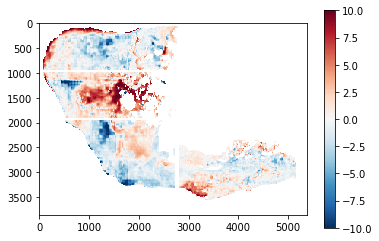

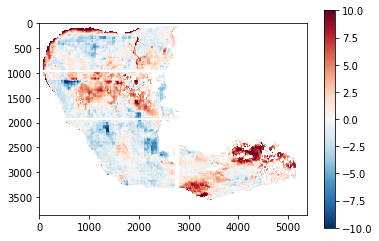

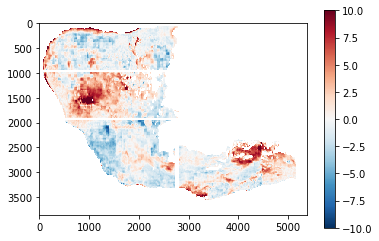

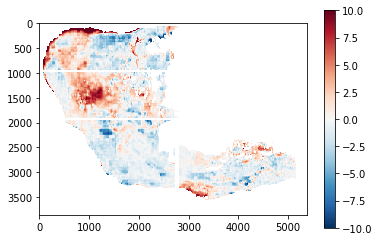

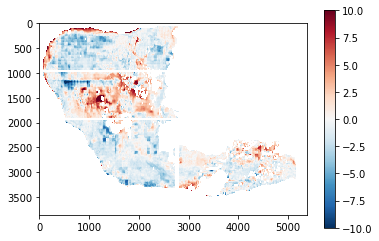

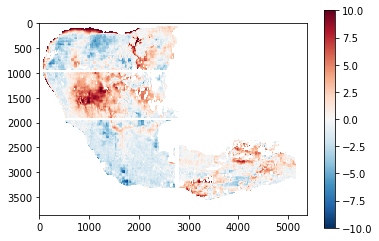

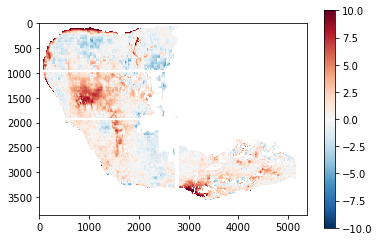

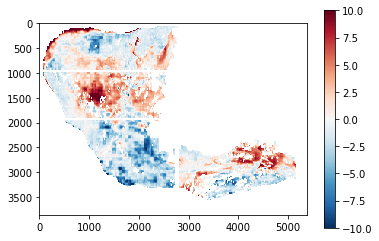

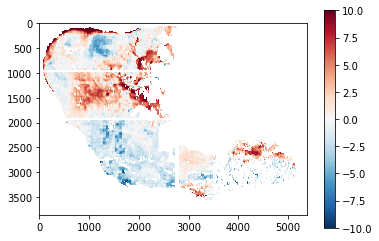

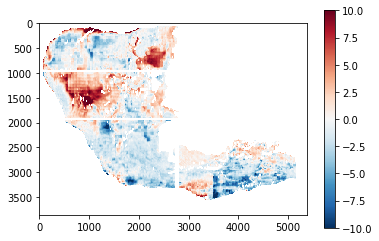

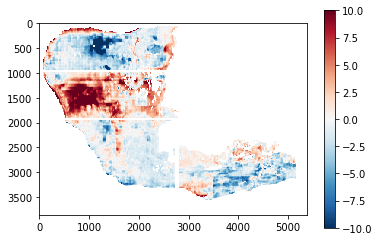

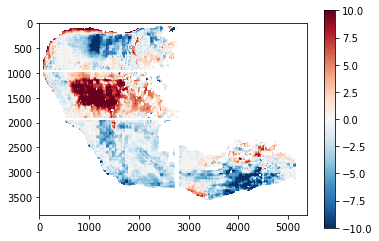

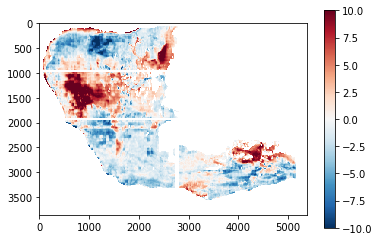

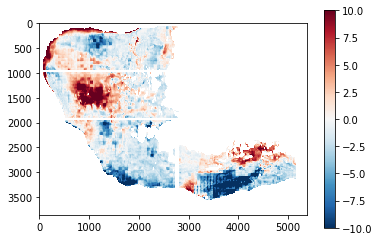

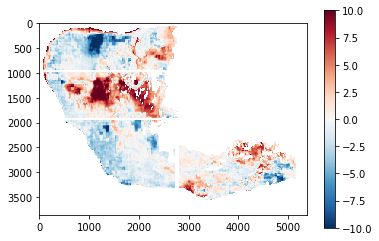

In [ ]:
from pathlib import Path # for reincursive folders
import gc
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import files

predictions_2019 = []
errors_2019 = []
metrics_outside_2019 = []

root_dir = '/content/drive/MyDrive/GEE_good_2019/'


for filename in Path(root_dir).rglob('*.tif'):
  try:
      filename = str(filename)
      date = filename[37:47] # select date of image
      with rasterio.open(filename) as src:
          image = src.read()
      gc.collect()
      print(date)
      image = stack_layers(image, ref, reference) # Remove NaN values and stack reference data
      image = remove_nan(image) # Remove NaN values and stack reference data

      # Only keep pixels shallower than 20m
      image = np.transpose(image, (1, 2, 0))
      print(image.shape)
      #image = clean_image(image)
      image = normalize_image(image)

      ### IMAGE 1
      print('\n image 1:')
      image_no_1 = np.copy(image)
      image_no_1[70:1035,:, :] = np.nan
      image_1 = image[70:1035,:, :]
      # Extract patches
      patch_size = (64, 64, 13)
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_1, image_1)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area1'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_1 = list((rmse, r2, mae))
      print(metrics_1)
      pred_image_1 = reshape_predictions(predictions, image_1, patch_size, removed_indices)

      ### IMAGE 2
      print('\n image 2:')
      image_no_2 = np.copy(image)
      image_no_2[1035:2000,:,:] = np.nan
      image_2 = image[1035:2000,:,:]
      # Extract patches
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_2, image_2)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area2'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_2 = list((rmse, r2, mae))
      print(metrics_2)
      pred_image_2 = reshape_predictions(predictions, image_2, patch_size, removed_indices)

      ### IMAGE 3
      print('\n image 3:')
      image_no_3 = np.copy(image)
      image_no_3[2000:,:2800,:] = np.nan
      image_3 = image[2000:,:2800,:]
      # Extract patches
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_3, image_3)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area3'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_3 = list((rmse, r2, mae))
      print(metrics_3)
      pred_image_3 = reshape_predictions(predictions, image_3, patch_size, removed_indices)

      ### IMAGE 4
      print('\n image 4:')
      image_no_4 = np.copy(image)
      image_no_4[2000:,2800:,:] = np.nan
      image_4 = image[2000:,2800:,:]
      # Extract patches
      patch_size = (64, 64, 13)
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_4, image_4)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area4'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_4 = list((rmse, r2, mae))
      print(metrics)
      pred_image_4 = reshape_predictions(predictions, image_4, patch_size, removed_indices)

      ## MERGE PREDICTIONS
      # Add metrics seperate areas
      metrics_4_areas = metrics_1 + metrics_2 + metrics_3 + metrics_4
      print('metrics 4 areas: ',metrics_4_areas)
      # Merge predictions
      ref_all = concat_ref_images(image_1, image_2, image_3, image_4)
      y_pred_all_masked, ref_all_masked = reshape_all_predictions(pred_image_1, pred_image_2, pred_image_3, pred_image_4, ref_all)
      df3, mae, rmse, r2 = evaluate_model(y_pred_all_masked, ref_all_masked)
      metrics_full_area = list((rmse, r2, mae))
      metrics_complete = metrics_full_area + metrics_4_areas
      print('metrics complete: ', metrics_complete)
      metrics_outside_2019.append((date,metrics_complete))
      # Compute error
      error =  y_pred_all_masked - ref_all_masked

      # Save predictions, metrics and error
      errors_2019.append(error)
      predictions_2019.append(y_pred_all_masked)

      # Visualize the reshaped zeroed_patches_test array
      plt.figure()
      norm = mcolors.TwoSlopeNorm(vmin=-10, vmax = 10, vcenter=0)
      pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
      plt.colorbar(pc)

  except Exception as e:
    # code to handle the exception
    print(e)
    pass



In [ ]:
# From list to array with all 2022 predictions
predictions_2019_array = np.asarray(predictions_2019)
array_median_2019 = np.nanmedian(predictions_2019_array, axis = 0)
errors_2019_array = np.asarray(errors_2019)

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [ ]:
np.save('/content/drive/My Drive/Predictions_final/UNet_2019_predictions_no_max_v2.npy', predictions_2019_array)
np.save('/content/drive/My Drive/Predictions_final/UNet_2019_errors_no_max_v2.npy', errors_2019_array)
np.save('/content/drive/My Drive/Predictions_final/UNet_2019_median_no_max_v2.npy', array_median_2019)


In [ ]:
# From list of 65 arrays to array with 65 bands
metrics_array = np.asarray(metrics_outside_2019)
df = pd.DataFrame(metrics_array)
df[['RMSE','R2','MAE','RMSE_1', 'R2_1', 'MAE_1', 'RMSE_2', 'R2_2', 'MAE_2', 'RMSE_3','R2_3','MAE_3','RMSE_4','R2_4','MAE_4']] = df[1].apply(pd.Series)
df.drop(columns = 1, inplace = True)
df.to_csv('/content/drive/My Drive/Predictions_final/UNet_2019_metrics_no_max_v2.csv')

<ipython-input-14-4e9cbd2cb99e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics_array = np.asarray(metrics_outside_2019)


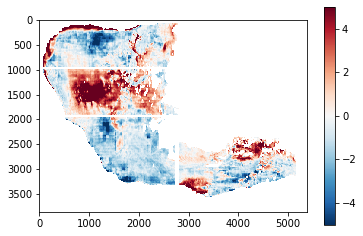

In [ ]:
error =  array_median_2019 - ref_all_masked

# Visualize the reshaped zeroed_patches_test array
import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=-5, vmax = 5, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

In [ ]:
df3, mae, rmse, r2 = evaluate_model(array_median_2019, ref_all_masked)
print(mae, rmse, r2)

RMSE: 2.8858437138654267
1.940576819317165 2.887604127548149 0.8452434271424694


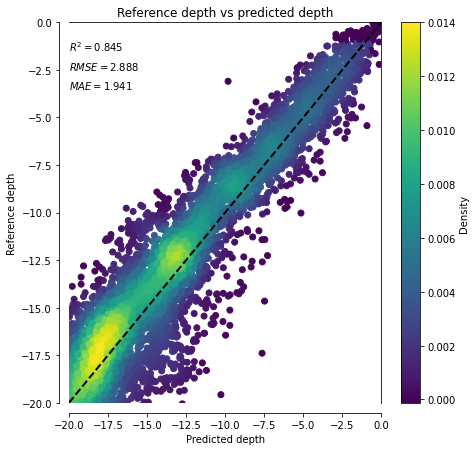

In [ ]:
df3_sample = df3.sample(n = 10000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,7))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-20,0])
    ax.set_ylim([-20,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -2.5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -3.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=250)

    return ax

if "__main__" == __name__ :
  density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])


# UNEt all regions: 2020

2020-02-02
(3783, 5389, 13)
shape:  8735227

 image 1:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1649, 64, 64, 13)
(1649, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(554, 64, 64, 13)
(554, 64, 64, 13)
18/18 [==============================] - 1s 12ms/step
(554, 64, 64, 1)
RMSE: 4.9816995542773315
[3.721362524712129, 0.818954499326439, 2.281924578327568]

 image 2:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1641, 64, 64, 13)
(1641, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(554, 64, 64, 13)
(554, 64, 64, 13)
18/18 [==============================] - 1s 12ms/step
(554, 64, 64, 1)
RMSE: 4.178855095257063
[3.0929122495318966, 0.7840311728350609, 2.310042204549956]

 image 3:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1642, 64, 64, 13)
(1642, 64, 64, 13)
Number of patches for testing: 1161
Patch shape: (64, 64, 13)
(529, 64, 64, 13)
(529, 64, 64, 13)
17/17 [==========

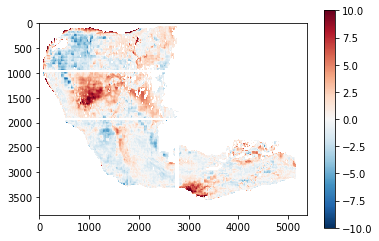

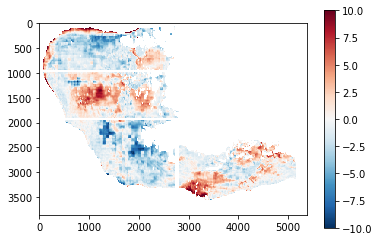

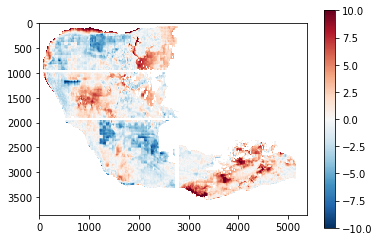

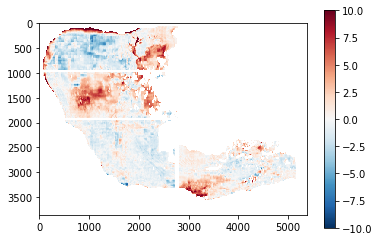

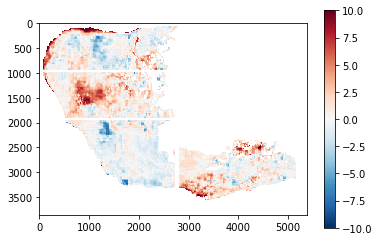

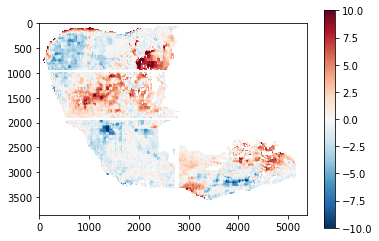

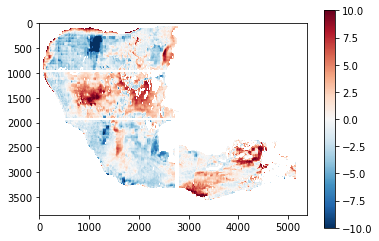

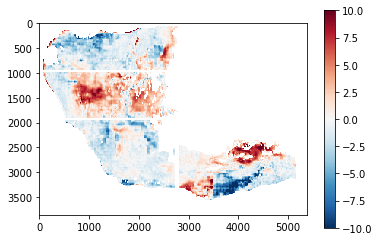

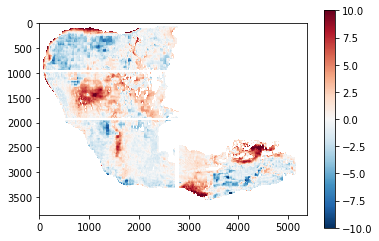

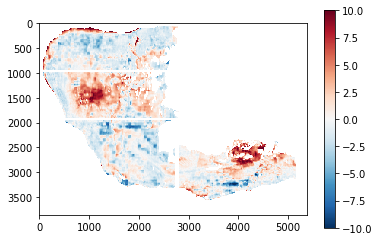

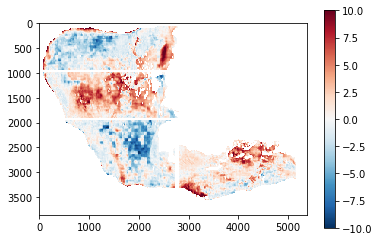

In [ ]:
from pathlib import Path # for reincursive folders
import gc
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import files

predictions_2020 = []
errors_2020 = []
metrics_outside_2020 = []

root_dir = '/content/drive/MyDrive/GEE_good_2020/'


for filename in Path(root_dir).rglob('*.tif'):
  try:
      filename = str(filename)
      date = filename[37:47] # select date of image
      with rasterio.open(filename) as src:
          image = src.read()
      gc.collect()
      print(date)
      image = stack_layers(image, ref, reference) # Remove NaN values and stack reference data
      image = remove_nan(image) # Remove NaN values and stack reference data

      # Only keep pixels shallower than 20m
      image = np.transpose(image, (1, 2, 0))
      print(image.shape)
    #  image = clean_image(image)
      image = normalize_image(image)

      ### IMAGE 1
      print('\n image 1:')
      image_no_1 = np.copy(image)
      image_no_1[70:1035,:, :] = np.nan
      image_1 = image[70:1035,:, :]
      # Extract patches
      patch_size = (64, 64, 13)
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_1, image_1)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_dir = '/content/drive/My Drive/Models/'
      model_filename = 'UNet_v2_area1'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_1 = list((rmse, r2, mae))
      print(metrics_1)
      pred_image_1 = reshape_predictions(predictions, image_1, patch_size, removed_indices)

      ### IMAGE 2
      print('\n image 2:')
      image_no_2 = np.copy(image)
      image_no_2[1035:2000,:,:] = np.nan
      image_2 = image[1035:2000,:,:]
      # Extract patches
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_2, image_2)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area2'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_2 = list((rmse, r2, mae))
      print(metrics_2)
      pred_image_2 = reshape_predictions(predictions, image_2, patch_size, removed_indices)

      ### IMAGE 3
      print('\n image 3:')
      image_no_3 = np.copy(image)
      image_no_3[2000:,:2800,:] = np.nan
      image_3 = image[2000:,:2800,:]
      # Extract patches
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_3, image_3)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area3'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_3 = list((rmse, r2, mae))
      print(metrics_3)
      pred_image_3 = reshape_predictions(predictions, image_3, patch_size, removed_indices)

      ### IMAGE 4
      print('\n image 4:')
      image_no_4 = np.copy(image)
      image_no_4[2000:,2800:,:] = np.nan
      image_4 = image[2000:,2800:,:]
      # Extract patches
      patch_size = (64, 64, 13)
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_4, image_4)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area4'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_4 = list((rmse, r2, mae))
      print(metrics)
      pred_image_4 = reshape_predictions(predictions, image_4, patch_size, removed_indices)

      ## MERGE PREDICTIONS
      # Add metrics seperate areas
      metrics_4_areas = metrics_1 + metrics_2 + metrics_3 + metrics_4
      print('metrics 4 areas: ',metrics_4_areas)
      # Merge predictions
      ref_all = concat_ref_images(image_1, image_2, image_3, image_4)
      y_pred_all_masked, ref_all_masked = reshape_all_predictions(pred_image_1, pred_image_2, pred_image_3, pred_image_4, ref_all)
      df3, mae, rmse, r2 = evaluate_model(y_pred_all_masked, ref_all_masked)
      metrics_full_area = list((rmse, r2, mae))
      metrics_complete = metrics_full_area + metrics_4_areas
      print('metrics complete: ', metrics_complete)
      metrics_outside_2020.append((date,metrics_complete))
      # Compute error
      error =  y_pred_all_masked - ref_all_masked

      # Save predictions, metrics and error
      errors_2020.append(error)
      predictions_2020.append(y_pred_all_masked)

      # Visualize the reshaped zeroed_patches_test array
      plt.figure()
      norm = mcolors.TwoSlopeNorm(vmin=-10, vmax = 10, vcenter=0)
      pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
      plt.colorbar(pc)

  except Exception as e:
    # code to handle the exception
    print(e)
    pass



In [ ]:
# From list to array with all 2022 predictions
predictions_2020_array = np.asarray(predictions_2020)
array_median_2020 = np.nanmedian(predictions_2020_array, axis = 0)
errors_2020_array = np.asarray(errors_2020)

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [ ]:
np.save('/content/drive/My Drive/Predictions_final/UNet_2020_predictions_no_max_v2.npy', predictions_2020_array)
np.save('/content/drive/My Drive/Predictions_final/UNet_2020_errors_no_max_v2.npy', errors_2020_array)
np.save('/content/drive/My Drive/Predictions_final/UNet_2020_median_no_max_v2.npy', array_median_2020)


In [ ]:
# From list of 65 arrays to array with 65 bands
metrics_array = np.asarray(metrics_outside_2020)
df = pd.DataFrame(metrics_array)
df[['RMSE','R2','MAE','RMSE_1', 'R2_1', 'MAE_1', 'RMSE_2', 'R2_2', 'MAE_2', 'RMSE_3','R2_3','MAE_3','RMSE_4','R2_4','MAE_4']] = df[1].apply(pd.Series)
df.drop(columns = 1, inplace = True)
df.to_csv('/content/drive/My Drive/Predictions_final/UNet_2020_metrics_no_max_v2.csv')

<ipython-input-22-7df9f4c17696>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics_array = np.asarray(metrics_outside_2020)


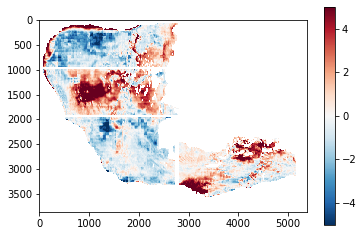

In [ ]:
error =  array_median_2020 - ref_all_masked

# Visualize the reshaped zeroed_patches_test array
import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=-5, vmax = 5, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

In [ ]:
df3, mae, rmse, r2 = evaluate_model(array_median_2020, ref_all_masked)
print(mae, rmse, r2)

RMSE: 2.7701470117767477
1.8499328912477404 2.770880305566803 0.8573972903580331


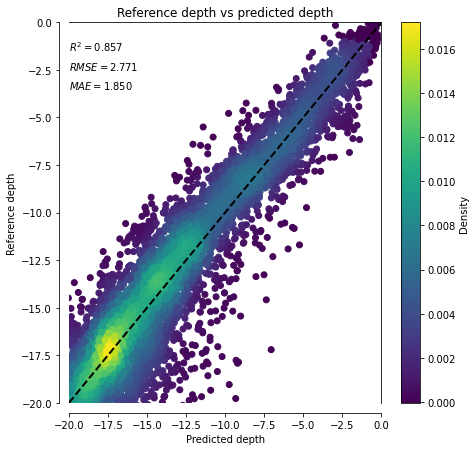

In [ ]:
df3_sample = df3.sample(n = 10000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,7))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-20,0])
    ax.set_ylim([-20,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -2.5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -3.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=250)

    return ax

if "__main__" == __name__ :
  density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])


# UNEt all regions: 2021

2021-01-07
(3783, 5389, 13)
shape:  8752528

 image 1:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1649, 64, 64, 13)
(1649, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(554, 64, 64, 13)
(554, 64, 64, 13)
18/18 [==============================] - 3s 21ms/step
(554, 64, 64, 1)
RMSE: 4.8409960739600235
[3.667919183002558, 0.8254910967102022, 2.3719418082542636]

 image 2:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1641, 64, 64, 13)
(1641, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(553, 64, 64, 13)
(553, 64, 64, 13)
18/18 [==============================] - 1s 25ms/step
(553, 64, 64, 1)
RMSE: 3.776743107182337
[2.533608027698077, 0.8550380398368282, 1.9175980251435152]

 image 3:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1642, 64, 64, 13)
(1642, 64, 64, 13)
Number of patches for testing: 1161
Patch shape: (64, 64, 13)
(529, 64, 64, 13)
(529, 64, 64, 13)
17/17 [========

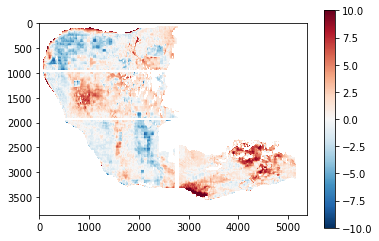

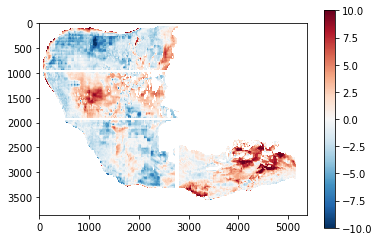

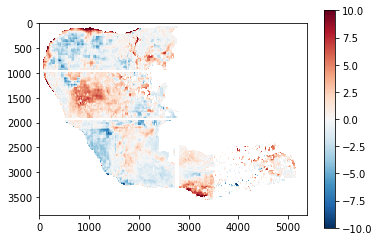

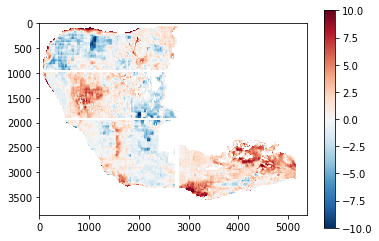

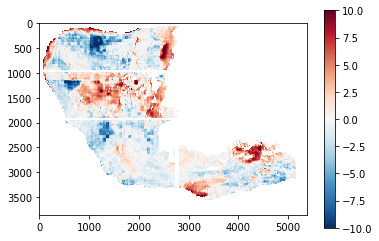

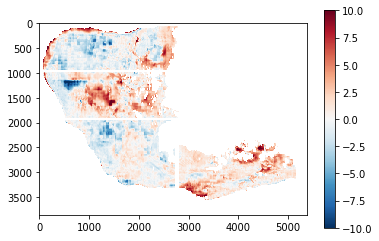

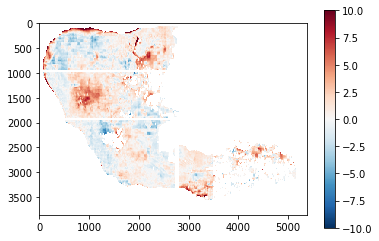

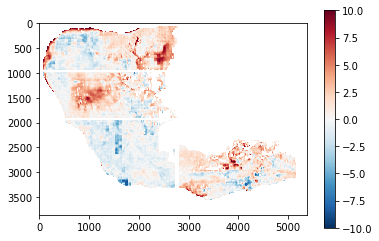

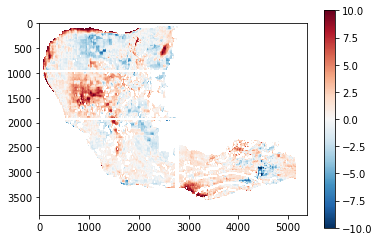

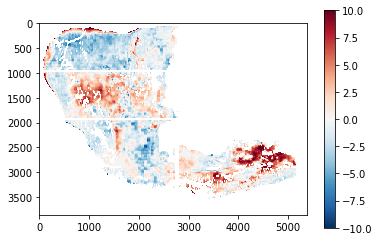

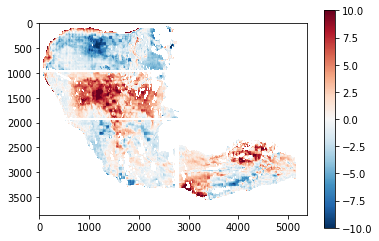

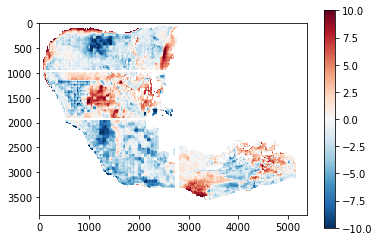

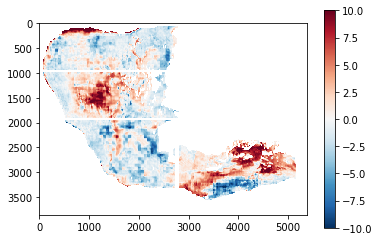

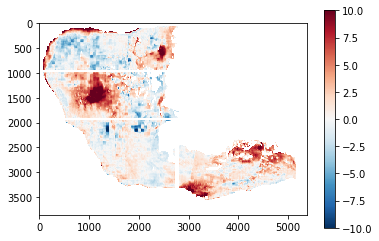

In [ ]:
from pathlib import Path # for reincursive folders
import gc
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import files

predictions_2021 = []
errors_2021 = []
metrics_outside_2021 = []

root_dir = '/content/drive/MyDrive/GEE_good_2021/'


for filename in Path(root_dir).rglob('*.tif'):
  try:
      filename = str(filename)
      date = filename[37:47] # select date of image
      with rasterio.open(filename) as src:
          image = src.read()
      gc.collect()
      print(date)
      image = stack_layers(image, ref, reference) # Remove NaN values and stack reference data
      image = remove_nan(image) # Remove NaN values and stack reference data

      # Only keep pixels shallower than 20m
      image = np.transpose(image, (1, 2, 0))
      print(image.shape)
   #   image = clean_image(image)
      image = normalize_image(image)

      ### IMAGE 1
      print('\n image 1:')
      image_no_1 = np.copy(image)
      image_no_1[70:1035,:, :] = np.nan
      image_1 = image[70:1035,:, :]
      # Extract patches
      patch_size = (64, 64, 13)
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_1, image_1)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_dir = '/content/drive/My Drive/Models/'
      model_filename = 'UNet_v2_area1'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_1 = list((rmse, r2, mae))
      print(metrics_1)
      pred_image_1 = reshape_predictions(predictions, image_1, patch_size, removed_indices)

      ### IMAGE 2
      print('\n image 2:')
      image_no_2 = np.copy(image)
      image_no_2[1035:2000,:,:] = np.nan
      image_2 = image[1035:2000,:,:]
      # Extract patches
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_2, image_2)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area2'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_2 = list((rmse, r2, mae))
      print(metrics_2)
      pred_image_2 = reshape_predictions(predictions, image_2, patch_size, removed_indices)

      ### IMAGE 3
      print('\n image 3:')
      image_no_3 = np.copy(image)
      image_no_3[2000:,:2800,:] = np.nan
      image_3 = image[2000:,:2800,:]
      # Extract patches
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_3, image_3)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area3'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_3 = list((rmse, r2, mae))
      print(metrics_3)
      pred_image_3 = reshape_predictions(predictions, image_3, patch_size, removed_indices)

      ### IMAGE 4
      print('\n image 4:')
      image_no_4 = np.copy(image)
      image_no_4[2000:,2800:,:] = np.nan
      image_4 = image[2000:,2800:,:]
      # Extract patches
      patch_size = (64, 64, 13)
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_4, image_4)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area4'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_4 = list((rmse, r2, mae))
      print(metrics)
      pred_image_4 = reshape_predictions(predictions, image_4, patch_size, removed_indices)

      ## MERGE PREDICTIONS
      # Add metrics seperate areas
      metrics_4_areas = metrics_1 + metrics_2 + metrics_3 + metrics_4
      print('metrics 4 areas: ',metrics_4_areas)
      # Merge predictions
      ref_all = concat_ref_images(image_1, image_2, image_3, image_4)
      y_pred_all_masked, ref_all_masked = reshape_all_predictions(pred_image_1, pred_image_2, pred_image_3, pred_image_4, ref_all)
      df3, mae, rmse, r2 = evaluate_model(y_pred_all_masked, ref_all_masked)
      metrics_full_area = list((rmse, r2, mae))
      metrics_complete = metrics_full_area + metrics_4_areas
      print('metrics complete: ', metrics_complete)
      metrics_outside_2021.append((date,metrics_complete))
      # Compute error
      error =  y_pred_all_masked - ref_all_masked

      # Save predictions, metrics and error
      errors_2021.append(error)
      predictions_2021.append(y_pred_all_masked)

      # Visualize the reshaped zeroed_patches_test array
      plt.figure()
      norm = mcolors.TwoSlopeNorm(vmin=-10, vmax = 10, vcenter=0)
      pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
      plt.colorbar(pc)

  except Exception as e:
    # code to handle the exception
    print(e)
    pass



In [ ]:
# From list to array with all 2022 predictions
predictions_2021_array = np.asarray(predictions_2021)
array_median_2021 = np.nanmedian(predictions_2021_array, axis = 0)
errors_2021_array = np.asarray(errors_2021)

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [ ]:
np.save('/content/drive/My Drive/Predictions_final/UNet_2021_predictions_no_max_v2.npy', predictions_2021_array)
np.save('/content/drive/My Drive/Predictions_final/UNet_2021_errors_no_max_v2.npy', errors_2021_array)
np.save('/content/drive/My Drive/Predictions_final/UNet_2021_median_no_max_v2.npy', array_median_2021)


In [ ]:
# From list of 65 arrays to array with 65 bands
metrics_array = np.asarray(metrics_outside_2021)
df = pd.DataFrame(metrics_array)
df[['RMSE','R2','MAE','RMSE_1', 'R2_1', 'MAE_1', 'RMSE_2', 'R2_2', 'MAE_2', 'RMSE_3','R2_3','MAE_3','RMSE_4','R2_4','MAE_4']] = df[1].apply(pd.Series)
df.drop(columns = 1, inplace = True)
df.to_csv('/content/drive/My Drive/Predictions_final/UNet_2021_metrics_no_max_v2.csv')

<ipython-input-13-4da769412e84>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics_array = np.asarray(metrics_outside_2021)


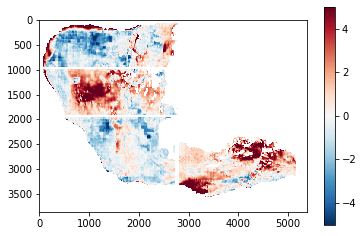

In [ ]:
error =  array_median_2021 - ref_all_masked

# Visualize the reshaped zeroed_patches_test array
import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=-5, vmax = 5, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

In [ ]:
df3, mae, rmse, r2 = evaluate_model(array_median_2021, ref_all_masked)
print(mae, rmse, r2)

RMSE: 2.7112654323205376
1.791295557686975 2.711216019421242 0.8624894118493261


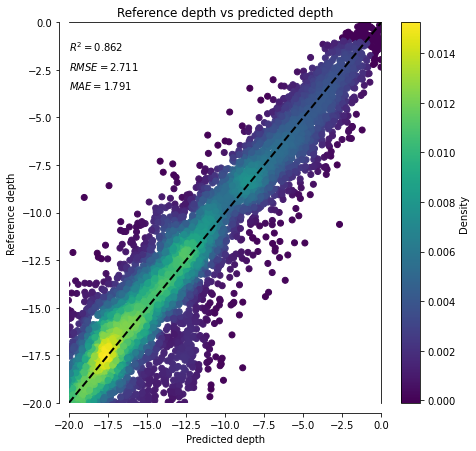

In [ ]:
df3_sample = df3.sample(n = 10000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,7))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-20,0])
    ax.set_ylim([-20,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -2.5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -3.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=250)

    return ax

if "__main__" == __name__ :
  density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])


# UNEt all regions: 2022

2022-01-12
(3783, 5389, 13)
shape:  8755689

 image 1:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1649, 64, 64, 13)
(1649, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(554, 64, 64, 13)
(554, 64, 64, 13)
18/18 [==============================] - 3s 22ms/step
(554, 64, 64, 1)
RMSE: 5.078378618569829
[3.963037174637759, 0.7964176826567493, 2.4784712320772555]

 image 2:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1641, 64, 64, 13)
(1641, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(554, 64, 64, 13)
(554, 64, 64, 13)
18/18 [==============================] - 1s 12ms/step
(554, 64, 64, 1)
RMSE: 4.51836982223252
[3.6178727470694727, 0.7054387687440368, 2.8903165318716395]

 image 3:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1642, 64, 64, 13)
(1642, 64, 64, 13)
Number of patches for testing: 1161
Patch shape: (64, 64, 13)
(529, 64, 64, 13)
(529, 64, 64, 13)
17/17 [=========

3/3 [==============================] - 0s 10ms/step
(72, 64, 64, 1)
RMSE: 9.711971510272077
[2.3506397666815984, 0.8169365736569236, 1.662657650135795]

 image 2:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(1011, 64, 64, 13)
(1011, 64, 64, 13)
Number of patches for testing: 1260
Patch shape: (64, 64, 13)
(135, 64, 64, 13)
(135, 64, 64, 13)


5/5 [==============================] - 0s 11ms/step
(135, 64, 64, 1)
RMSE: 10.597862617601283
[2.619348854250417, 0.7839619389261762, 1.9716189382460814]

 image 3:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(735, 64, 64, 13)
(735, 64, 64, 13)
Number of patches for testing: 1161
Patch shape: (64, 64, 13)
(398, 64, 64, 13)
(398, 64, 64, 13)
13/13 [==============================] - 1s 34ms/step
(398, 64, 64, 1)
RMSE: 9.387736131226413
[3.4368989985279077, 0.5028622317970701, 2.7551695871909043]

 image 4:
Number of patches for training: 4956
Patch shape: (64, 64, 13)
(613, 64, 64, 13)
(613, 64, 64, 13)
Number of patches for testing: 1080
Patch shape: (64, 64, 13)
(526, 64, 64, 13)
(526, 64, 64, 13)
17/17 [==============================] - 1s 12ms/step
(526, 64, 64, 1)
RMSE: 9.114030215765881
<module 'sklearn.metrics' from '/usr/local/lib/python3.9/dist-packages/sklearn/metrics/__init__.py'>
metrics 4 areas:  [2.3506397666815984, 0.8169365736569236, 1.662657650135795, 

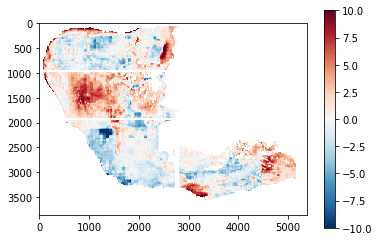

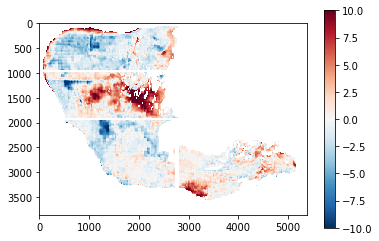

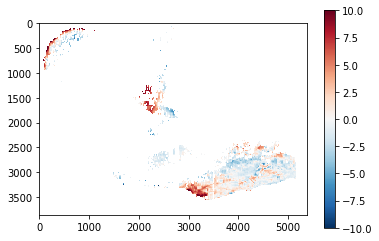

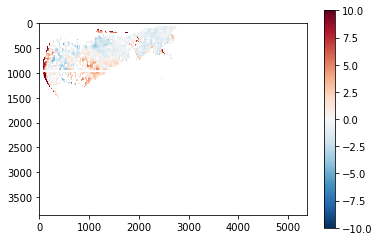

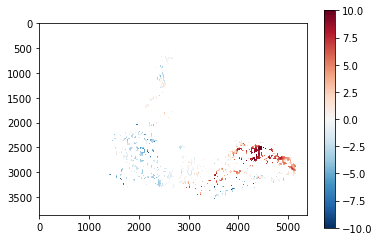

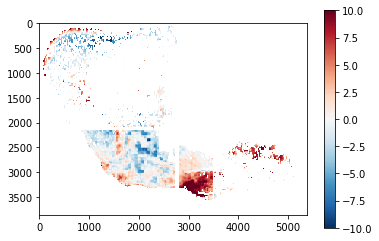

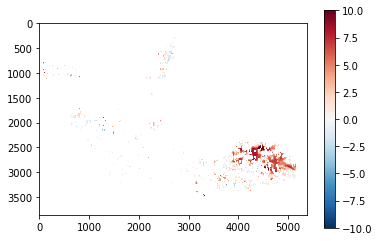

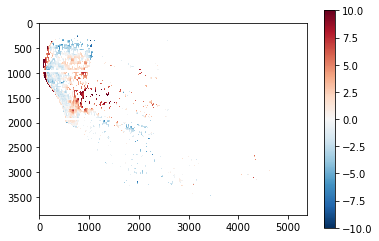

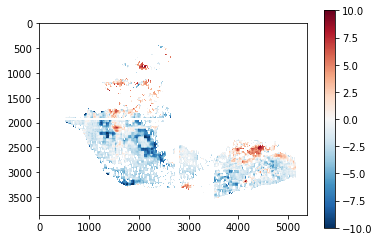

In [ ]:
from pathlib import Path # for reincursive folders
import gc
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import files

predictions_2022 = []
errors_2022 = []
metrics_outside_2022 = []

root_dir = '/content/drive/MyDrive/GEE_good_2022/'


for filename in Path(root_dir).rglob('*.tif'):
  try:
      filename = str(filename)
      date = filename[37:47] # select date of image
      with rasterio.open(filename) as src:
          image = src.read()
      gc.collect()
      print(date)
      image = stack_layers(image, ref, reference) # Remove NaN values and stack reference data
      image = remove_nan(image) # Remove NaN values and stack reference data

      # Only keep pixels shallower than 20m
      image = np.transpose(image, (1, 2, 0))
      print(image.shape)
    #  image = clean_image(image)
      image = normalize_image(image)

      ### IMAGE 1
      print('\n image 1:')
      image_no_1 = np.copy(image)
      image_no_1[70:1035,:, :] = np.nan
      image_1 = image[70:1035,:, :]
      # Extract patches
      patch_size = (64, 64, 13)
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_1, image_1)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_dir = '/content/drive/My Drive/Models/'
      model_filename = 'UNet_v2_area1'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_1 = list((rmse, r2, mae))
      print(metrics_1)
      pred_image_1 = reshape_predictions(predictions, image_1, patch_size, removed_indices)

      ### IMAGE 2
      print('\n image 2:')
      image_no_2 = np.copy(image)
      image_no_2[1035:2000,:,:] = np.nan
      image_2 = image[1035:2000,:,:]
      # Extract patches
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_2, image_2)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area2'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_2 = list((rmse, r2, mae))
      print(metrics_2)
      pred_image_2 = reshape_predictions(predictions, image_2, patch_size, removed_indices)

      ### IMAGE 3
      print('\n image 3:')
      image_no_3 = np.copy(image)
      image_no_3[2000:,:2800,:] = np.nan
      image_3 = image[2000:,:2800,:]
      # Extract patches
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_3, image_3)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area3'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_3 = list((rmse, r2, mae))
      print(metrics_3)
      pred_image_3 = reshape_predictions(predictions, image_3, patch_size, removed_indices)

      ### IMAGE 4
      print('\n image 4:')
      image_no_4 = np.copy(image)
      image_no_4[2000:,2800:,:] = np.nan
      image_4 = image[2000:,2800:,:]
      # Extract patches
      patch_size = (64, 64, 13)
      zeroed_patches_train, zeroed_patches_test, removed_indices = extract_zeroed_patches(image_no_4, image_4)
      # Define train, test and validation sets
      X_train, y_train, X_val, y_val, X_test, y_test = split_data(zeroed_patches_train, zeroed_patches_test, patch_size, val_prop=0.25)
      # Predict
      # Load the model
      model_filename = 'UNet_v2_area4'
      model = tf.keras.models.load_model(os.path.join(model_dir, model_filename), custom_objects={'masked_rmse': masked_rmse})
      predictions = model.predict(X_test)
      print(predictions.shape)
      # Get metrics
      df3, mae, rmse, r2 = evaluate_model(predictions, y_test)
      metrics_4 = list((rmse, r2, mae))
      print(metrics)
      pred_image_4 = reshape_predictions(predictions, image_4, patch_size, removed_indices)

      ## MERGE PREDICTIONS
      # Add metrics seperate areas
      metrics_4_areas = metrics_1 + metrics_2 + metrics_3 + metrics_4
      print('metrics 4 areas: ',metrics_4_areas)
      # Merge predictions
      ref_all = concat_ref_images(image_1, image_2, image_3, image_4)
      y_pred_all_masked, ref_all_masked = reshape_all_predictions(pred_image_1, pred_image_2, pred_image_3, pred_image_4, ref_all)
      df3, mae, rmse, r2 = evaluate_model(y_pred_all_masked, ref_all_masked)
      metrics_full_area = list((rmse, r2, mae))
      metrics_complete = metrics_full_area + metrics_4_areas
      print('metrics complete: ', metrics_complete)
      metrics_outside_2022.append((date,metrics_complete))
      # Compute error
      error =  y_pred_all_masked - ref_all_masked

      # Save predictions, metrics and error
      errors_2022.append(error)
      predictions_2022.append(y_pred_all_masked)

      # Visualize the reshaped zeroed_patches_test array
      plt.figure()
      norm = mcolors.TwoSlopeNorm(vmin=-10, vmax = 10, vcenter=0)
      pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
      plt.colorbar(pc)

  except Exception as e:
    # code to handle the exception
    print(e)
    pass



In [ ]:
# From list to array with all 2022 predictions
predictions_2022_array = np.asarray(predictions_2022)
array_median_2022 = np.nanmedian(predictions_2022_array, axis = 0)
errors_2022_array = np.asarray(errors_2022)

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [ ]:
np.save('/content/drive/My Drive/Predictions_final/UNet_2022_predictions_no_max_v2.npy', predictions_2022_array)
np.save('/content/drive/My Drive/Predictions_final/UNet_2022_errors_no_max_v2.npy', errors_2022_array)
np.save('/content/drive/My Drive/Predictions_final/UNet_2022_median_no_max_v2.npy', array_median_2022)


In [ ]:
# From list of 65 arrays to array with 65 bands
metrics_array = np.asarray(metrics_outside_2022)
df = pd.DataFrame(metrics_array)
df[['RMSE','R2','MAE','RMSE_1', 'R2_1', 'MAE_1', 'RMSE_2', 'R2_2', 'MAE_2', 'RMSE_3','R2_3','MAE_3','RMSE_4','R2_4','MAE_4']] = df[1].apply(pd.Series)
df.drop(columns = 1, inplace = True)
df.to_csv('/content/drive/My Drive/Predictions_final/UNet_2022_metrics_no_max_v2.csv')

<ipython-input-13-92ddd122e020>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metrics_array = np.asarray(metrics_outside_2022)


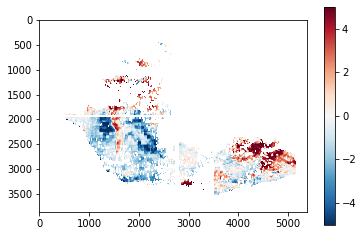

In [ ]:
error =  array_median_2022 - ref_all_masked
# Visualize the reshaped zeroed_patches_test array
import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=-5, vmax = 5, vcenter=0)
pc = plt.imshow(error, norm=norm, cmap="RdBu_r")
plt.colorbar(pc)

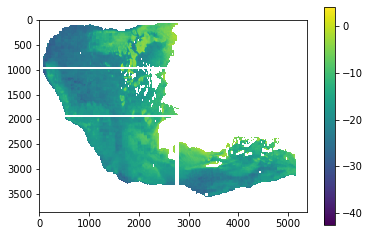

In [ ]:
pc = plt.imshow(array_median_2022)
plt.colorbar(pc)

In [ ]:
df3, mae, rmse, r2 = evaluate_model(array_median_2022, ref_all_masked)
print(mae, rmse, r2)

RMSE: 2.624881629419144
1.9889991027793275 2.626250656531738 0.817211026915313


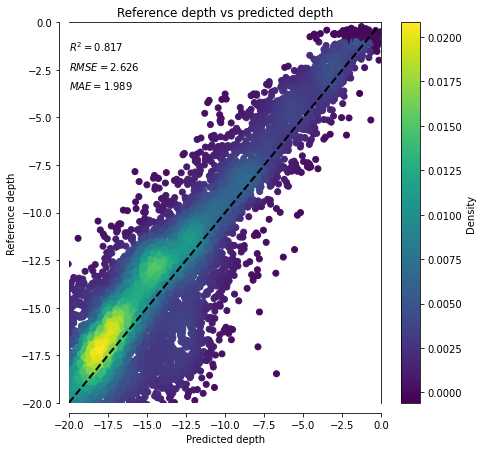

In [ ]:
df3_sample = df3.sample(n = 10000)
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,7))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)


    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-20,0])
    ax.set_ylim([-20,0])
    ax.set_xlabel("Predicted depth")
    ax.set_ylabel("Reference depth")
    ax.annotate("$R^2={:.3f}$".format(r2), (-20, -1.5))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-20, -2.5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-20, -3.5))

    ax.plot([df3_sample['Reference'].min(), df3_sample['Reference'].max()], [df3_sample['Reference'].min(), df3_sample['Reference'].max()], "--k", linewidth=2)
    plt.title("Reference depth vs predicted depth")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=250)

    return ax

if "__main__" == __name__ :
  density_scatter(df3_sample['Predicted'], df3_sample['Reference'], bins = [30,30])
